<a href="https://colab.research.google.com/github/Shyam456-IIIT/C_Program/blob/main/Normalization_(1)%5B1%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **DATA NORMALIZATION :-**

#### **Definition:**
*   **Normalization (Feature Scaling):** Normalization is the process of scaling numerical data to a standard range, typically to eliminate the influence of different units or scales across features..
*  It is used to
* Faster Convergence: Gradient descent works much better when all features are on similar scales

* Prevents Dominance: No single feature can dominate the learning process

* Numerical Stability: Reduces issues with floating-point precision



* *Common Normalization methods :*
  *   Min-Max Normalization
  *   Z-Score Normalization
  *   Decimal Scaling Normalization
* **Importance** Many machine learning algorithms (like those that calculate distances) are sensitive to the scale of the data. If one feature has a huge range (e.g., salary from 30,000 to 100,000) and another has a small one (e.g., age from 20 to 60), the feature with the larger range will unfairly have more influence on the result.

#### **1. The Min-Max Normalization Technique**
This is the most common and intuitive technique. It squeezes or stretches all your data to fit into a range, usually **[0, 1]**.

**Formula:**
```
X_normalized = (X - X_min) / (X_max - X_min)
```

**Here**
*   **X**: The original value you want to normalize.
*   **X_min**: The smallest value in the entire column.
*   **X_max**: The largest value in the entire column.
*   **X_normalized**: Your new, scaled value between 0 and 1.


**Example 1: Manual Calculation**

Let's say we have the `Age` data for a group of people: `[20, 25, 30, 35, 80]`

**Step 1: Find Min and Max**
*   `X_min` = 20
*   `X_max` = 80

**Step 2: Apply the Formula**
*   For the first person (Age=20):  
    `(20 - 20) / (80 - 20) = 0 / 60 = 0.0`
*   For the second person (Age=25):  
    `(25 - 20) / (80 - 20) = 5 / 60 ≈ 0.083`
*   For the last person (Age=80):  
    `(80 - 20) / (80 - 20) = 60 / 60 = 1.0`

**Result:** The normalized ages are `[0.0, 0.083, 0.167, 0.25, 1.0]`
            The normalized salaries are`[0.0 , 0.071 , 0.143 , 0.214 , 1.0 ]`

* **Explanation:** The youngest person becomes 0, the oldest becomes 1, and everyone else is scaled proportionally in between. Now, this `Age` data can be fairly compared with other scaled features, like income or height.



---


**Example 2: Using Scikit-Learn (The Easy Way!)**

In Python, we use the `scikit-learn` library to do this quickly.


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
''' This imports the MinMaxScaler class from scikit-learn's preprocessing module.
  This tool  scales your data to a specified range (usually 0 to 1) using the formula: (x - min) / (max - min). '''

# Sample data: 'Age' and 'Salary (£)'
data = {'Age': [20, 25, 30, 35, 80],
        'Salary (£)': [30000, 35000, 40000, 45000, 100000]}
df = pd.DataFrame(data)

print("Original Data:")
print(df)

# Step 1: Create the scaler object
scaler = MinMaxScaler()

# Step 2: Fit the scaler to the data and then transform the data
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
'''This applies the MinMaxScaler to entire DataFrame (df), scaling all numerical columns to a range between 0 and 1.
    It creates a new DataFrame (df_normalized) with the scaled values while preserving the original column names from your input DataFrame.'''
df_normalized = df_normalized.round(2)#round DataFrame to 2 decimals
print("\nNormalized Data (0 to 1):")
print(df_normalized)

Original Data:
   Age  Salary (£)
0   20       30000
1   25       35000
2   30       40000
3   35       45000
4   80      100000

Normalized Data (0 to 1):
    Age  Salary (£)
0  0.00        0.00
1  0.08        0.07
2  0.17        0.14
3  0.25        0.21
4  1.00        1.00


#### **Graphical Representation:**

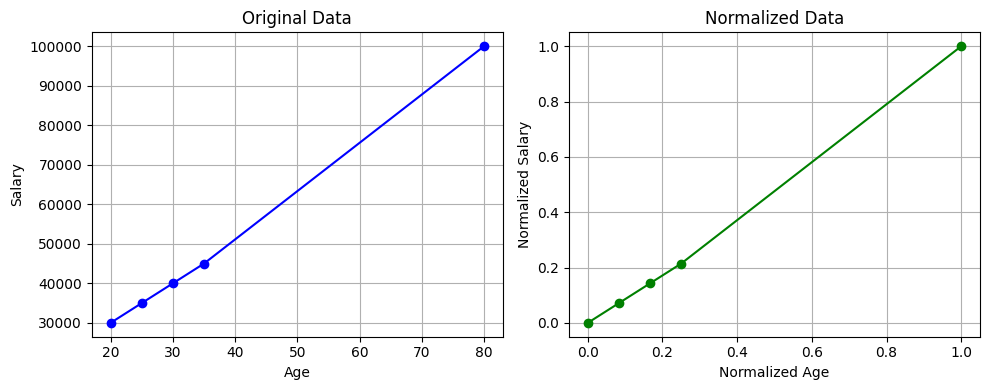

In [ ]:
import matplotlib.pyplot as plt

# Original data
ages = [20, 25, 30, 35, 80]
salaries = [30000, 35000, 40000, 45000, 100000]

# Min-Max Normalization
def min_max_normalize(data):
    return [(x - min(data)) / (max(data) - min(data)) for x in data]

normalized_ages = min_max_normalize(ages)
normalized_salaries = min_max_normalize(salaries)

# Plotting original data
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(ages, salaries, marker='o', color='blue')
plt.title("Original Data")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(True)

# Plotting normalized data
plt.subplot(1,2,2)
plt.plot(normalized_ages, normalized_salaries, marker='o', color='green')
plt.title("Normalized Data")
plt.xlabel("Normalized Age")
plt.ylabel("Normalized Salary")

plt.tight_layout()
plt.grid(True)
plt.show()

**Graph showing the normalized values between 0 and 1:**

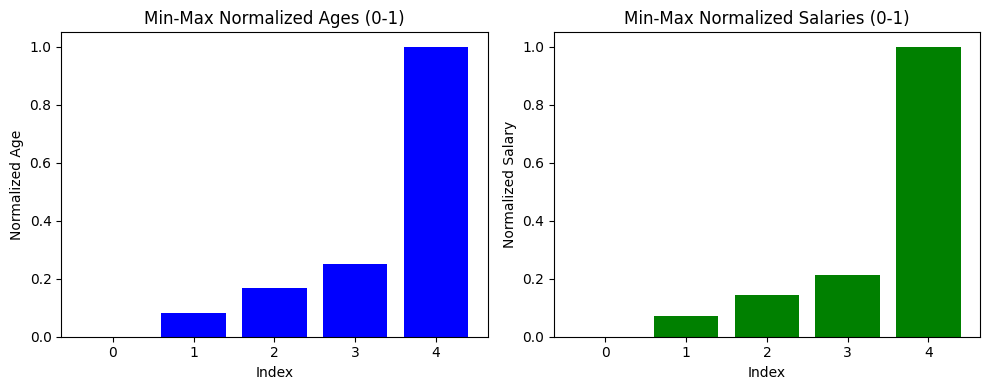

In [ ]:
import matplotlib.pyplot as plt

# Min-Max normalized data
norm_ages = [0, 0.083, 0.167, 0.25, 1]
norm_salaries = [0, 0.071, 0.143, 0.214, 1]

indices = range(len(norm_ages))

# Plotting
plt.figure(figsize=(10,4))

# Normalized Ages
plt.subplot(1,2,1)
plt.bar(indices, norm_ages, color='blue')
plt.title("Min-Max Normalized Ages (0-1)")
plt.xlabel("Index")
plt.ylabel("Normalized Age")

# Normalized Salaries
plt.subplot(1,2,2)
plt.bar(indices, norm_salaries, color='green')
plt.title("Min-Max Normalized Salaries (0-1)")
plt.xlabel("Index")
plt.ylabel("Normalized Salary")

plt.tight_layout()
plt.show()

**Explanation:**
1.  `MinMaxScaler()`: This is our "scaling machine".
2.  `.fit_transform(df)`: This does two things:
    *   **.fit():** The scaler learns the `min` and `max` of each column in your data.
    *   **.transform():** It uses the formula to scale all the data based on what it learned.


Now both `Age` and `Salary` are on the same 0-to-1 scale! A salary of £100,000 is 1.0, just like an age of 80 is 1.0.



###

### **2. Z-score Normalization (Standardization) Technique**
Centers data around 0 and scales it based on *standard deviation*.

**Formula:**  
```
x_standardized = (x - μ) / σ
```

**Here:**
* `x` : The value you want to normalize .
* `μ` : mean of the feature .
* `σ` : standard deviation .
* `x_standardized` : The scaled value between 0 and 1.




**Example 1: Manual Calculation**

Let's say we have the `Age` data for a group of people: `[20, 25, 30, 35, 80]`

**Step 1: Find Mean and Standard deviation**
*   `Mean` = 38
*   `Standard deviation` = 21.59

**Step 2: Apply the Formula**
*   For the first person (Age=20):  
    `(20 - 38) / (21.59) = -18 / 21.59 = -0.83`
*   For the second person (Age=25):  
    `(25 - 38) / (21.59) = -13 / 21.59 =-0.60`
*   For the last person (Age=80):  
    `(80 - 38) / (21.59) = 42 / 21.59 = 1.94`

**Result:** The normalized ages are `[-0.83 , -0.60 ,-0.37 , -0.13 , 1.94]`
            The normalized salaries are `[-0.785 , -0.588 , -0.392 , -0.196 , 1.961]`

            For normalized salaries the Mean is 50,000 ans Standard deviation is 25,495.


In [ ]:
from sklearn.preprocessing import StandardScaler
'''  This imports the StandardScaler class from scikit-learn's preprocessing module.
     It standardizes data by transforming it to have a mean of 0 and a standard deviation of 1 using the formula: (x - mean) / standard_deviation.'''
scaler = StandardScaler()
df['Z_Score_Age'] = scaler.fit_transform(df[['Age']]).round(2)
''' Creates a StandardScaler object that will calculate the mean and standard deviation needed for standardization.
    Fits the scaler to the 'Age' column, transforms the values to z-scores, and adds them as a new column 'Z_Score_Age' in the DataFrame.'''

print(df)

   Age  Salary (£)  Z_Score_Age
0   20       30000        -0.83
1   25       35000        -0.60
2   30       40000        -0.37
3   35       45000        -0.14
4   80      100000         1.95


**Graphical Representation:**

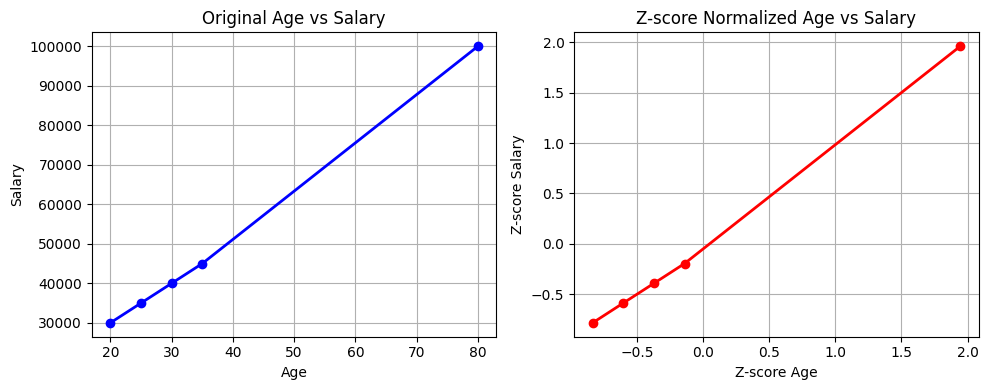

In [ ]:
import matplotlib.pyplot as plt

# Original data
ages = [20, 25, 30, 35, 80]
salaries = [30000, 35000, 40000, 45000, 100000]

# Z-score normalized data
z_ages = [-0.834, -0.602, -0.370, -0.139, 1.945]
z_salaries = [-0.785, -0.588, -0.392, -0.196, 1.961]

# Plotting
plt.figure(figsize=(10,4))

# Original Age vs Salary
plt.subplot(1,2,1)
plt.plot(ages, salaries, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title("Original Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(True)

# Z-score Normalized Age vs Salary
plt.subplot(1,2,2)
plt.plot(z_ages, z_salaries, marker='o', color='red', linestyle='-', linewidth=2)
plt.title("Z-score Normalized Age vs Salary")
plt.xlabel("Z-score Age")
plt.ylabel("Z-score Salary")
plt.grid(True)

plt.tight_layout()
plt.show()

**Centers data around 0 representing using bar graph:**

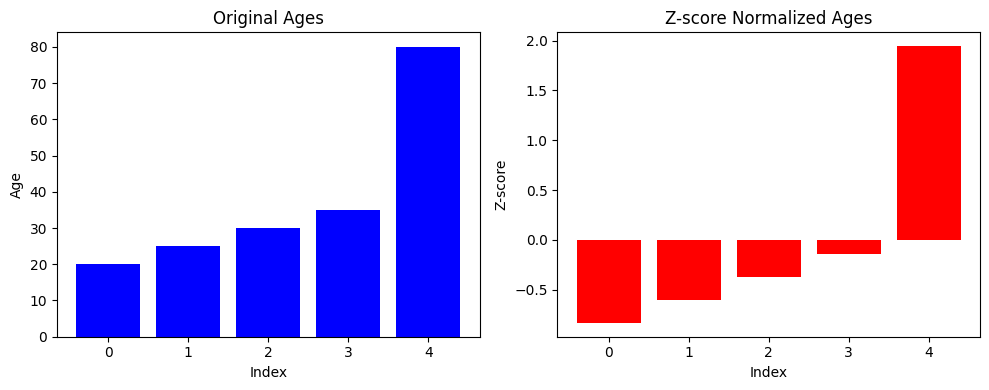

In [ ]:
import matplotlib.pyplot as plt

# Original ages
ages = [20, 25, 30, 35, 80]

# Z-score normalized ages
z_ages = [-0.834, -0.602, -0.370, -0.139, 1.945]

# X-axis indices
indices = range(len(ages))

# Plotting
plt.figure(figsize=(10,4))

# Original ages bar graph
plt.subplot(1,2,1)
plt.bar(indices, ages, color='blue')
plt.title("Original Ages")
plt.xlabel("Index")
plt.ylabel("Age")

# Z-score normalized ages bar graph
plt.subplot(1,2,2)
plt.bar(indices, z_ages, color='red')
plt.title("Z-score Normalized Ages")
plt.xlabel("Index")
plt.ylabel("Z-score")

plt.tight_layout()
plt.show()

**Understand Z_Score_Age:**
Z-scores tell us how far each value is from the average, measured in standard deviations:

Negative values = Below average

Positive values = Above average

Zero = Exactly average

Example: Z-score of -0.83 for age 20 means "20 is 0.83 standard deviations younger than the average person in this dataset."
* **Understand Standard deviation concept**
Standard deviation can be calculated using the formula $$\sigma = \sqrt{\frac{\sum (X_i - \mu)^2}{N}}$$
where,
* `$\mu$` is mean of all values.
* `N` is total number of values.
* `X_i` is the value we want to calculate.


### **3. Decimal Scaling Normalization**

Moves the decimal point based on the maximum absolute value.

 **Formula:**
```
x' =  x / (10^j)
```
**Let's break down the formula**
* `x'` :normalized value.
* `x` : original value.
* `j` :length of max number**

**Example 1: Manual Calculation**

Let's say we have the `Age` data for a group of people: `[20, 25, 30, 35, 80]`

**Step 1: Find  max absolute value**

* `max(|x'|)=80`

**Step 2: Find j such that (80 / 10^j) < 1**

* **`10^j > 80 ` ----`j=2`    ( since 10^2 = 100 >80 )**
*   For the first person (Age=20):  
    `(20) / (100) = 0.20`
*   For the second person (Age=25):  
    `(25) / (100) = 0.25`
*   For the last person (Age=80):  
    `(80) / (100) = 0.80`

**Result:** The normalized ages are `[ 0.20 , 0.25 , 0.30 , 0.35 , 0.80 ]`
            The normalized salaries are `[0.03 , 0.035 , 0.04 , 0.045 , 0.1]`

In [ ]:
import numpy as np
df['Decimal_Scaled_Age'] = (df['Age'] / (10 ** len(str(int(df['Age'].max()))))).round(2)
print(df)

   Age  Salary (£)  Z_Score_Age  Decimal_Scaled_Age
0   20       30000        -0.83                0.20
1   25       35000        -0.60                0.25
2   30       40000        -0.37                0.30
3   35       45000        -0.14                0.35
4   80      100000         1.95                0.80


**Graphical Representation:**

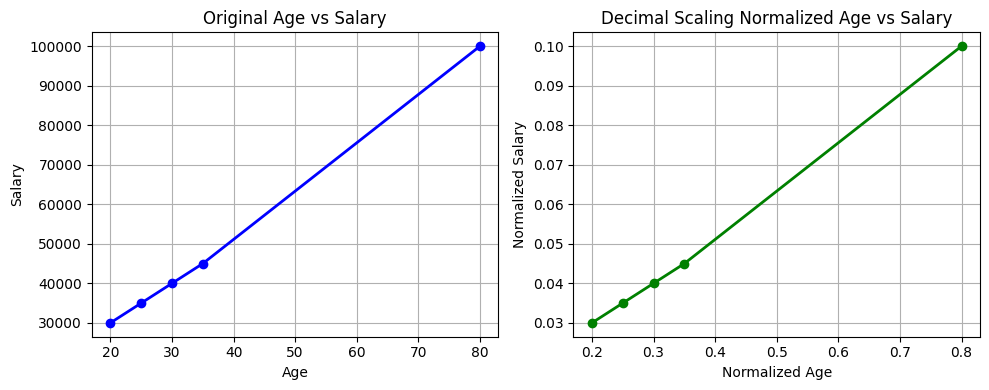

In [ ]:
import matplotlib.pyplot as plt

# Original data
ages = [20, 25, 30, 35, 80]
salaries = [30000, 35000, 40000, 45000, 100000]

# Decimal scaling normalization
decimal_ages = [x/100 for x in ages]
decimal_salaries = [x/1000000 for x in salaries]

# Plotting
plt.figure(figsize=(10,4))

# Original Age vs Salary
plt.subplot(1,2,1)
plt.plot(ages, salaries, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title("Original Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(True)

# Decimal Scaling Normalized Age vs Salary
plt.subplot(1,2,2)
plt.plot(decimal_ages, decimal_salaries, marker='o', color='green', linestyle='-', linewidth=2)
plt.title("Decimal Scaling Normalized Age vs Salary")
plt.xlabel("Normalized Age")
plt.ylabel("Normalized Salary")
plt.grid(True)
plt.tight_layout()
plt.show()

**Graph showing ages and salaries with index as reference on x-axis:**

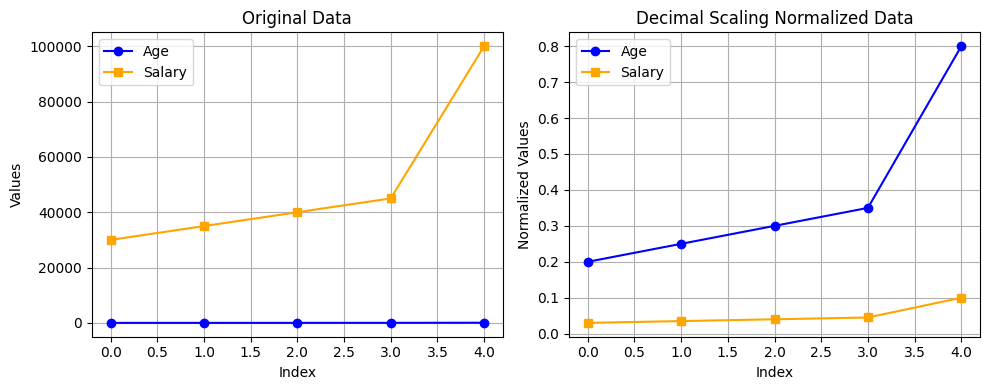

In [ ]:
import matplotlib.pyplot as plt

# Original data
ages = [20, 25, 30, 35, 80]
salaries = [30000, 35000, 40000, 45000, 100000]

# Decimal scaling normalization
decimal_ages = [x/100 for x in ages]
decimal_salaries = [x/1000000 for x in salaries]

indices = range(len(ages))

# Plotting
plt.figure(figsize=(10,4))

# Original data line plot
plt.subplot(1,2,1)
plt.plot(indices, ages, marker='o', color='blue', label="Age")
plt.plot(indices, salaries, marker='s', color='orange', label="Salary")
plt.title("Original Data")
plt.xlabel("Index")
plt.ylabel("Values")
plt.legend()
plt.grid(True)

# Decimal scaling normalized data line plot
plt.subplot(1,2,2)
plt.plot(indices, decimal_ages, marker='o', color='blue', label="Age")
plt.plot(indices, decimal_salaries, marker='s', color='orange', label="Salary")
plt.title("Decimal Scaling Normalized Data")
plt.xlabel("Index")
plt.ylabel("Normalized Values")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

This performs decimal scaling by dividing each age value by 10 raised to the number of digits in the maximum age.
    It scales all ages to the range [-1, 1] and rounds to 2 decimal places, storing results in a new column 'Decimal_Scaled_Age'.
Example: If max age is 80 (2 digits), it divides all ages by 10² = 100, so age 20 becomes 0.20.

* **Min-Max Normalization** scales the data  into a **fixed range,usually 0 to 1**, preserving the original distribution while bounding values , which is useful for neural networks .

* **Z-Scale Normalization** transforms data to have a ***mean of 0 and standard deviation of 1*** , making it  ideal for algorithm sensitive to feature scale , like SVM , KNN , and PCA .

* **Decimal Scaling Normalization** simply **shifts the decimal point based on the maximum value** , providing  a quick and easy way to scale data between -1 and 1 .
* ex:
"Think of normalizing student heights:"

Min-Max Normalization:
"Maps shortest student to 0, tallest to 1, others in between"

Z-Score Standardization:
"Shows how tall each student is compared to average height"
 used in  Machine learning algorithms, dealing with outliers

Decimal Scaling:
"Just moves the decimal point (180cm → 1.80)" used in when we need smaller numbers.

